In [12]:
from sklearn.datasets import load_svmlight_file
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [13]:
valid = load_svmlight_file("validOutXGB")

In [14]:
X, y = valid[0], valid[1]

In [15]:
X = valid[0].todense()

In [16]:
pca = PCA(2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_emb = pca.transform(X)

In [21]:
X_emb.shape

(3649126, 2)

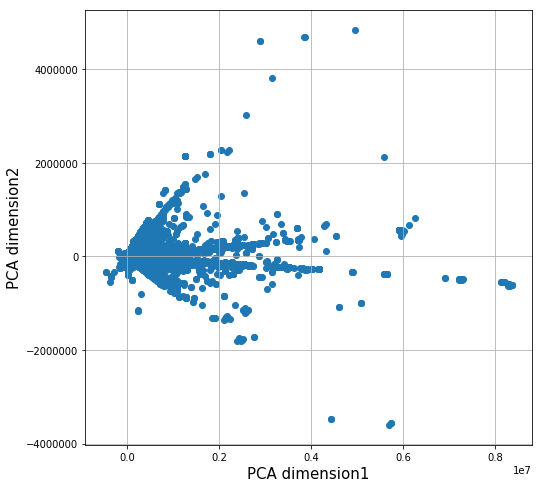

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PCA dimension1", fontsize=15)
ax.set_ylabel("PCA dimension2", fontsize=15)
ax.scatter(X_emb[:,0], X_emb[:,1])
ax.grid()

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
pca_std = PCA(2)
pca_std.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

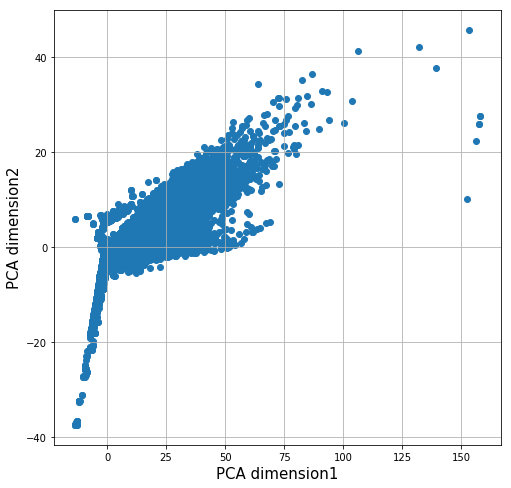

In [28]:
X_std_emb = pca_std.transform(X_std)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PCA dimension1", fontsize=15)
ax.set_ylabel("PCA dimension2", fontsize=15)
ax.scatter(X_std_emb[:,0], X_std_emb[:,1])
ax.grid()

In [51]:
def generate_plot(X_emb, X_mutate_emb, name=""):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PCA dimension1", fontsize=15)
    ax.set_ylabel("PCA dimension2", fontsize=15)
    ax.scatter(X_emb[:,0], X_emb[:,1], color='red', alpha=0.3)
    ax.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color='blue', alpha=0.3)
    ax.grid()
    #plt.scatter(X_emb[:,0], X_emb[:,1], color='red')
    #plt.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color='blue')
    plt.savefig(name)
    

In [22]:
# For we are mutating feature 0
import copy
import collections
def get_mutate_embeddings(featureId, X, pca, std=False, min_value=None, max_value=None, interval=None, value_list=None):
    b = np.array(X[:, featureId]).squeeze()
    feature_values = list(collections.Counter(list(b)).keys())
    if min_value == None:
        min_value = int(min(feature_values))
    if max_value == None:
        max_value = int(max(feature_values))
    if interval == None:
        interval = 1
    embeddings = {}
    if not value_list:
        value_list = xrange(min_value, max_value + 1, interval)
    for value in value_list:
        tmp = copy.deepcopy(X[:, featureId])
        X[:, featureId] = value
        if not std:
            X_emb = pca.transform(X)
        else:
            X_emb = pca.transform(StandardScaler().fit_transform(X))
        X[:, featureId] = tmp
        embeddings[value] = X_emb
        
    return embeddings
        
    

In [32]:
featureId = 6
mutate_embeddings = {}
mutate_embeddings = get_mutate_embeddings(featureId, X, pca, std=False, value_list=[0, 100, 3000, 30000])
#mutate_embeddings = get_mutate_embeddings(featureId, X, pca_std, std=True, value_list=[0, 100, 3000, 30000])

In [28]:
mutate_embeddings.keys()

dict_keys([0, 100, 3000, 30000])

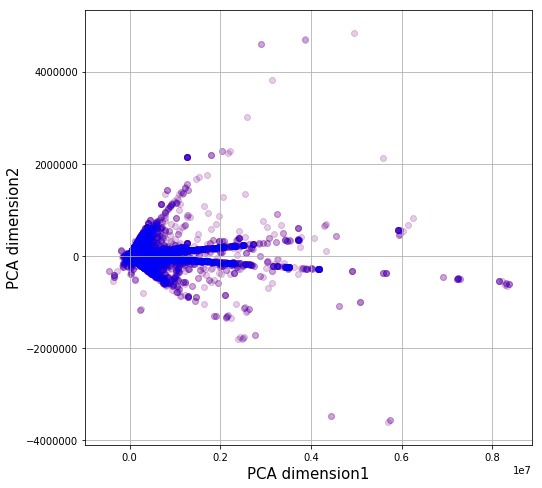

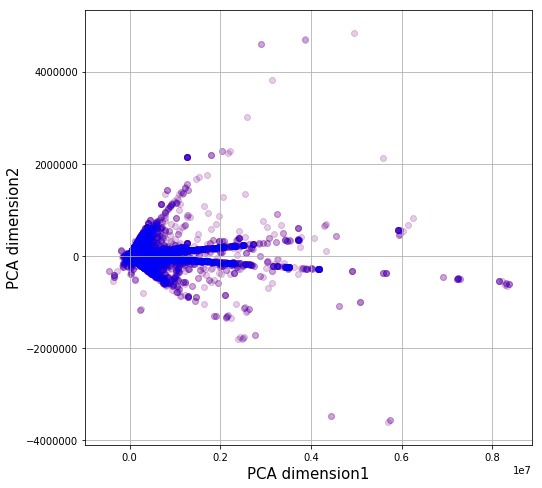

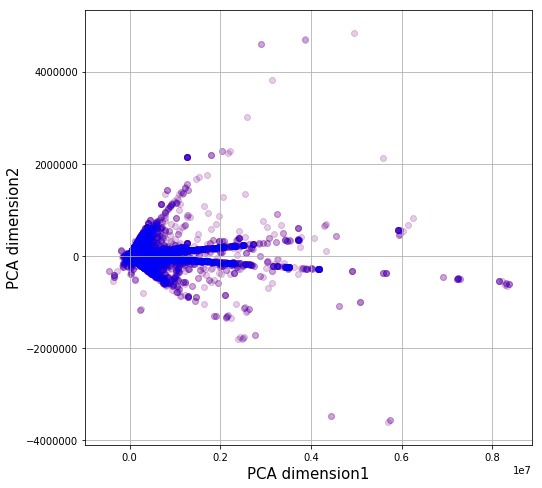

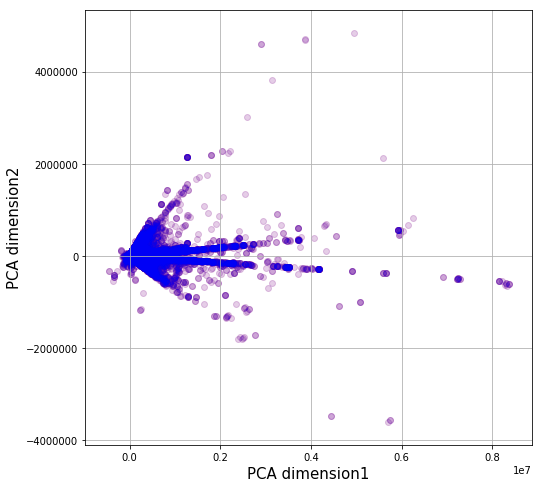

In [33]:
for feature_value in mutate_embeddings.keys():
    generate_plot(X_emb, mutate_embeddings[feature_value], name="PCA_feature{0}={1}".format(featureId, feature_value))


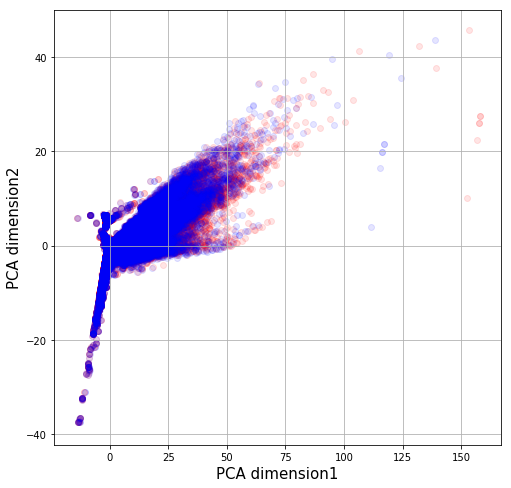

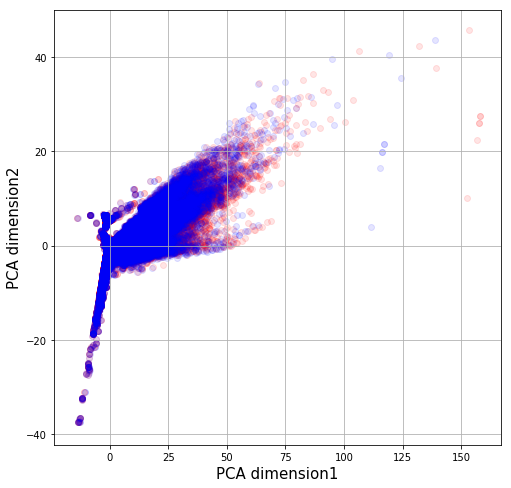

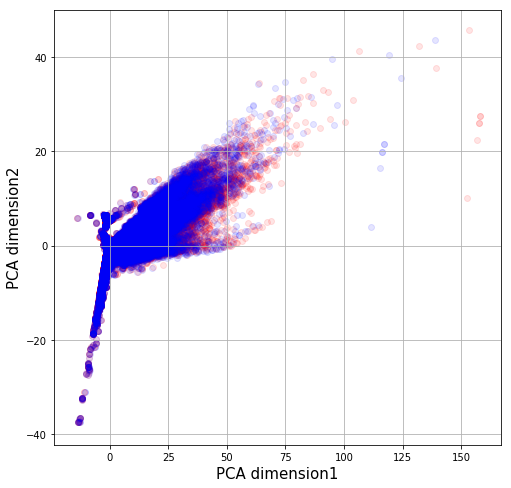

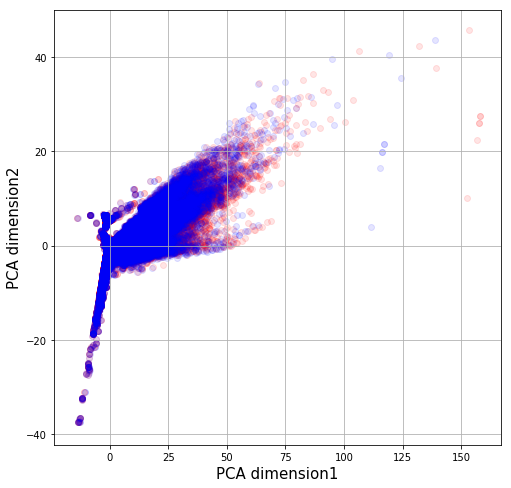

In [24]:
X_std_emb = pca_std.transform(X_std)
for feature_value in mutate_embeddings.keys():
    generate_plot(X_std_emb, mutate_embeddings[feature_value], name="PCA_std_feature{0}={1}".format(featureId, feature_value))

# for key in embeddings_0:
#     embedding = embeddings_0[key]
    

In [64]:
embeddings_0[0].shape

(3649126, 2)

In [10]:
def get_mutate_embeddings_single_vector(featureId, X, pca, std=False, min_value=None, max_value=None, interval=None, value_list=None):
    if interval == None:
        interval = 1
    embeddings = {}
    if not value_list:
        value_list = xrange(min_value, max_value + 1, interval)
    for value in value_list:
        tmp = copy.deepcopy(X[:, featureId])
        X[:, featureId] = value
        if not std:
            X_emb = pca.transform(X)
        else:
            X_emb = pca.transform(StandardScaler().fit_transform(X))
        X[:, featureId] = tmp
        embeddings[value] = X_emb[0]
        
    return embeddings

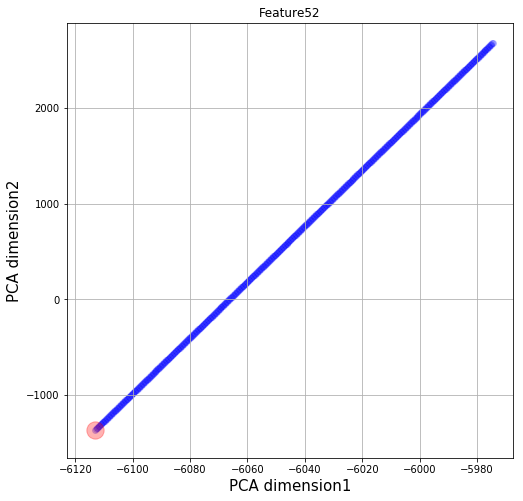

In [19]:
import copy
def generate_trajectory(X_emb, X_mutate_emb, name="", title="", color='blue'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PCA dimension1", fontsize=15)
    ax.set_ylabel("PCA dimension2", fontsize=15)
    ax.set_title(title)
    ax.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color=color, alpha=0.2)
    ax.scatter(X_emb[0], X_emb[1], color='red', alpha=0.3, s=300)
    ax.grid()
    #plt.scatter(X_emb[:,0], X_emb[:,1], color='red')
    #plt.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color='blue')
    plt.savefig(name)
    
# plot trajactpry
featureId = 52
data_idx = 0
value_list = [i for i in range(0, 30000, 50)]
mutate_embeddings = get_mutate_embeddings_single_vector(featureId, X[data_idx, :], pca, std=False, value_list=value_list)

generate_trajectory(X_emb[data_idx, :], np.array(list(mutate_embeddings.values())), 
                    name="data{0}_feature{1}_trajactory".format(data_idx, featureId), 
                    title="Feature{0}".format(featureId))

In [54]:
X_emb[0, :]

array([-6112.97900382, -1360.05962494])

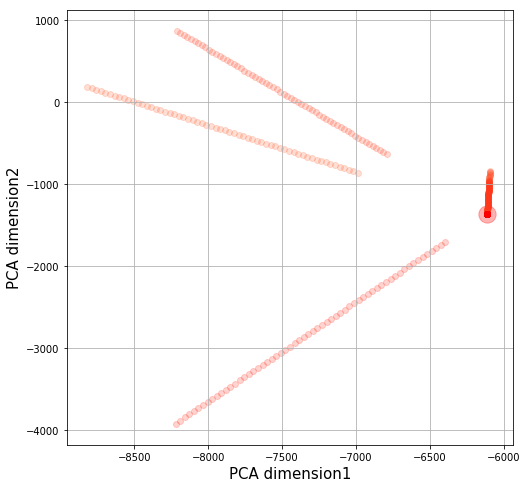

In [24]:
import matplotlib.cm as cm
def generate_trajectory(X, pca, value_list, data_idx=0, name="", title="", color='blue'):
    X_emb = pca.transform(X)[0]
    name="data{0}_allFeature_trajactory".format(data_idx)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PCA dimension1", fontsize=15)
    ax.set_ylabel("PCA dimension2", fontsize=15)
    ax.set_title(title)    
    ax.scatter(X_emb[0], X_emb[1], color='red', alpha=0.3, s=300)
    colors = cm.rainbow(np.linspace(0, 1, 57))
    
    for featureId in range(57):
        mutate_embeddings = get_mutate_embeddings_single_vector(featureId, X, pca, std=False, value_list=value_list)
        X_mutate_emb = np.array(list(mutate_embeddings.values()))
        ax.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color=colors[featureId], alpha=0.2)
    ax.grid()

    plt.savefig(name)
    
# plot trajactpry
data_idx = 0
value_list = [i for i in range(0, 3000, 50)]
#mutate_embeddings = get_mutate_embeddings_single_vector(featureId, X[data_idx, :], pca, std=False, value_list=value_list)
generate_trajectory(X[data_idx, :], pca, value_list, data_idx, name="trajectory_all_features")

In [7]:
import matplotlib.cm as cm
def generate_trajectory(X, pca, value_list, data_idx=0, name="", title="", color='blue'):
    X_emb = pca.transform(X)[0]
    name="data{0}_allFeature_trajactory".format(data_idx)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PCA dimension1", fontsize=15)
    ax.set_ylabel("PCA dimension2", fontsize=15)
    ax.set_title(title)    
    ax.scatter(X_emb[0], X_emb[1], color='red', alpha=0.3, s=300)
    colors = cm.rainbow(np.linspace(0, 1, 57)
#     for featureId in range(57):
#         mutate_embeddings = get_mutate_embeddings_single_vector(featureId, X, pca, std=False, value_list=value_list)
#         X_mutate_emb = np.array(list(mutate_embeddings.values()))
#         ax.scatter(X_mutate_emb[:,0], X_mutate_emb[:,1], color=colors[featureId], alpha=0.2)
#     ax.colorbar()
#     ax.grid()

#     plt.savefig(name)
    
# plot trajactpry
data_idx = 0
value_list = [i for i in range(0, 3000, 50)]
#mutate_embeddings = get_mutate_embeddings_single_vector(featureId, X[data_idx, :], pca, std=False, value_list=value_list)
generate_trajectory(X[data_idx, :], pca, value_list, data_idx)

SyntaxError: invalid syntax (<ipython-input-7-0931f5883f99>, line 22)